***Insurance Claims Charges Prediction***

# **Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url="https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv"
df=pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Exploratory Data Analysis(EDA)**

## **Cleaning Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [4]:
df=df.drop_duplicates()

In [5]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## **Visualization**

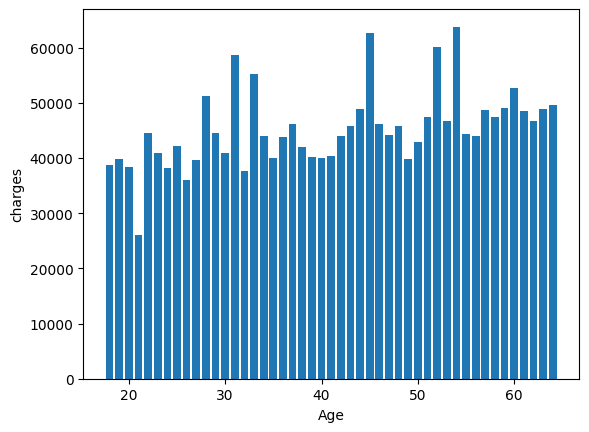

In [5]:
#Age vs Charges
x=df['age']
y=df['charges']
plt.bar(x,y)
plt.xlabel("Age")
plt.ylabel("charges")
plt.show()

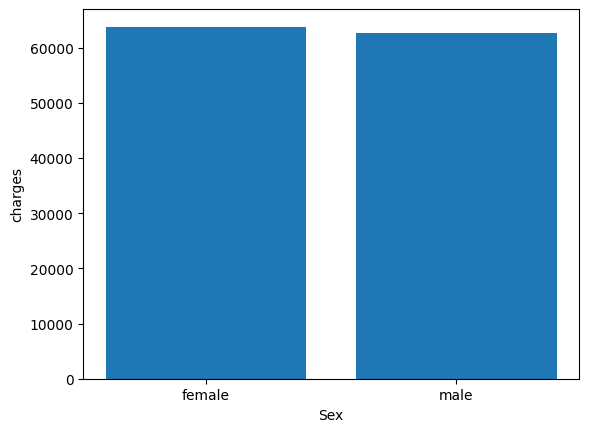

In [6]:
#Sex vs Charges
x=df['sex']
y=df['charges']
plt.bar(x,y)
plt.xlabel("Sex")
plt.ylabel("charges")
plt.show()

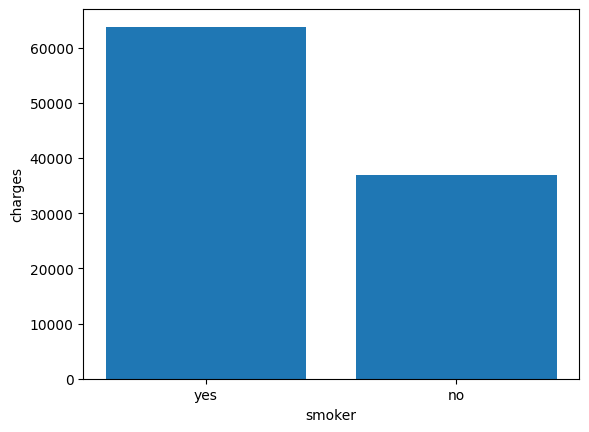

In [7]:
#smoker vs Charges
x=df['smoker']
y=df['charges']
plt.xlabel("smoker")
plt.ylabel("charges")
plt.bar(x,y)

plt.show()

# **Data Preprocessing**

## **Label Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [11]:
#remove region
df=df.drop('region',axis=1)
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


## **Data Splitting**

In [17]:
y=df['charges']
x=df.drop('charges',axis=1)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


## **Data Scalling**

In [32]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x['age']=ss.fit_transform(np.array(x['age']).reshape(-1,1))
x['bmi']=ss.fit_transform(np.array(x['bmi']).reshape(-1,1))
x['children']=ss.fit_transform(np.array(x['children']).reshape(-1,1))
x

,age,sex,bmi,children,smoker
0,-1.438764,0,-0.453320,-0.908614,1
1,-1.509965,1,0.509621,-0.078767,0
2,-0.797954,1,0.383307,1.580926,0
3,-0.441948,1,-1.305531,-0.908614,0
4,-0.513149,1,-0.292556,-0.908614,0
...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0
1334,-1.509965,0,0.206139,-0.908614,0
1335,-1.509965,0,1.014878,-0.908614,0
1336,-1.296362,0,-0.797813,-0.908614,0


# **Model Building**

## **Linear Regression**

In [20]:
#creating the model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
#make prediction

y_train_lr_pred=lr.predict(x_train)
y_test_lr_pred=lr.predict(x_test)
y_train_lr_pred

array([33756.57907535,  3706.05229199, 30173.26604329, ...,
        6316.51975589,  4313.76724316,  2875.95681721])

In [42]:
#Mean squre error and r2 score

from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse=mean_squared_error(y_train,y_train_lr_pred)
lr_test_mse=mean_squared_error(y_test,y_test_lr_pred)

lr_train_r2=r2_score(y_train,y_train_lr_pred)
lr_test_r2=r2_score(y_test,y_test_lr_pred)
print(lr_train_r2)
print(lr_test_r2)

0.7361388804467515
0.7978644236809904


## **Support Vector Machine**

In [39]:
#creating the model
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [41]:
#make prediction
y_train_svr_pred=svr.predict(x_train)
y_test_svr_pred=svr.predict(x_test)
y_train_svr_pred


array([9370.8000392 , 9282.37285346, 9298.31557869, ..., 9387.30987895,
       9285.47662902, 9342.84381492])

In [43]:
#Mean squre error and r2 score

from sklearn.metrics import mean_squared_error,r2_score

svr_train_mse=mean_squared_error(y_train,y_train_svr_pred)
svr_test_mse=mean_squared_error(y_test,y_test_svr_pred)

svr_train_r2=r2_score(y_train,y_train_svr_pred)
svr_test_r2=r2_score(y_test,y_test_svr_pred)
print(svr_train_r2)
print(svr_test_r2)

-0.09743088419872326
-0.10353897216046315


## **Decision Tree**

In [44]:
#creating the model
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
#make prediction
y_train_dtr_pred=svr.predict(x_train)
y_test_dtr_pred=svr.predict(x_test)
y_train_dtr_pred

array([9370.8000392 , 9282.37285346, 9298.31557869, ..., 9387.30987895,
       9285.47662902, 9342.84381492])

In [46]:
#Mean squre error and r2 score

from sklearn.metrics import mean_squared_error,r2_score

dtr_train_mse=mean_squared_error(y_train,y_train_dtr_pred)
dtr_test_mse=mean_squared_error(y_test,y_test_dtr_pred)

dtr_train_r2=r2_score(y_train,y_train_dtr_pred)
dtr_test_r2=r2_score(y_test,y_test_dtr_pred)
print(dtr_train_r2)
print(dtr_test_r2)

-0.09743088419872326
-0.10353897216046315


## **Random Forest**

In [47]:
#creating the model
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [48]:
#make prediction
y_train_rfr_pred=svr.predict(x_train)
y_test_rfr_pred=svr.predict(x_test)
y_train_rfr_pred

array([9370.8000392 , 9282.37285346, 9298.31557869, ..., 9387.30987895,
       9285.47662902, 9342.84381492])

In [49]:
#Mean squre error and r2 score

from sklearn.metrics import mean_squared_error,r2_score

rfr_train_mse=mean_squared_error(y_train,y_train_rfr_pred)
rfr_test_mse=mean_squared_error(y_test,y_test_rfr_pred)

rfr_train_r2=r2_score(y_train,y_train_rfr_pred)
rfr_test_r2=r2_score(y_test,y_test_rfr_pred)
print(rfr_train_r2)
print(rfr_test_r2)

-0.09743088419872326
-0.10353897216046315


# **Evaluate performence**

In [56]:
data={'method':["linear Regression","SVM","Decision Tree","Random forest"],
      'training Mse':[lr_train_mse,svr_train_mse,dtr_train_mse,rfr_train_mse],
      'test Mse':[lr_test_mse,svr_test_mse,dtr_test_mse,rfr_test_mse],
      'training r2':[lr_train_r2,svr_train_r2,dtr_train_r2,rfr_train_r2],
      'test r2':[lr_test_r2,svr_test_r2,dtr_test_r2,rfr_test_r2]
      }

result=pd.DataFrame(data)
result.columns=["method","training Mse","test Mse","training r2","test r2"]
result

,method,training Mse,test Mse,training r2,test r2
0,linear Regression,3.782875e+07,3.216583e+07,0.736139,0.797864
1,SVM,1.573344e+08,1.756061e+08,-0.097431,-0.103539
2,Decision Tree,1.573344e+08,1.756061e+08,-0.097431,-0.103539
3,Random forest,1.573344e+08,1.756061e+08,-0.097431,-0.103539
